### Importing Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

### Import and Preparing Data

In [2]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df['Unnamed: 0']=df['Unnamed: 0'].astype('category')
df.dtypes

Unnamed: 0    category
Murder         float64
Assault          int64
UrbanPop         int64
Rape           float64
dtype: object

In [5]:
df.rename(columns={'Unnamed: 0':'States'}, inplace=True)
df.tail()

,States,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
df.set_index('States', inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape
States,,,,


In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Visualisation:

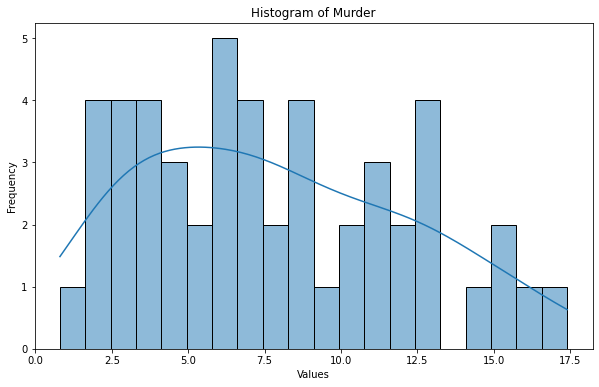

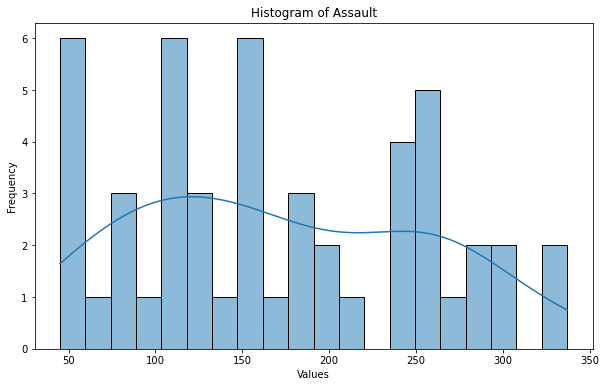

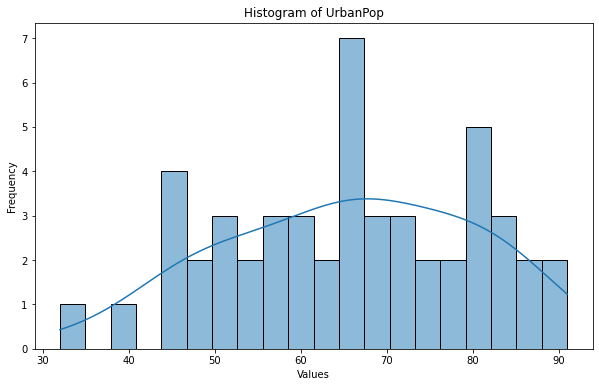

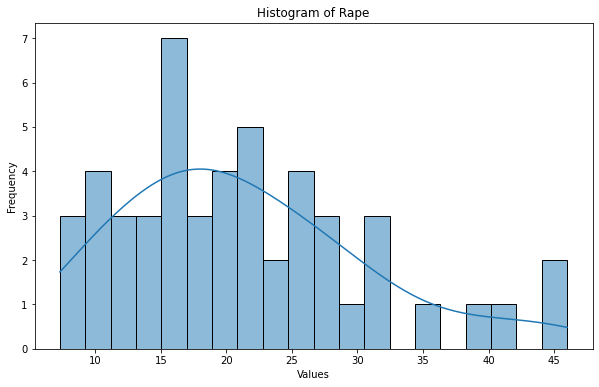

In [9]:
# Histogram
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

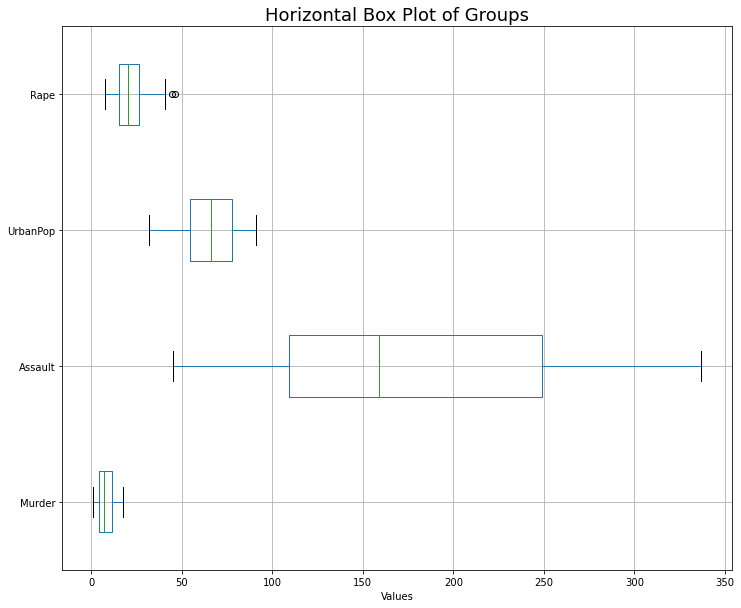

In [10]:
plt.figure(figsize=(12, 10))
df.boxplot(vert=False)
plt.title('Horizontal Box Plot of Groups', size=18)
plt.xlabel('Values')
plt.show()

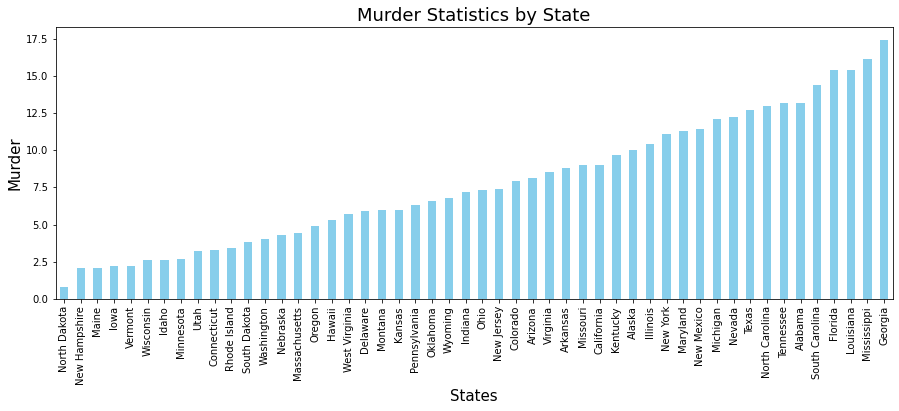

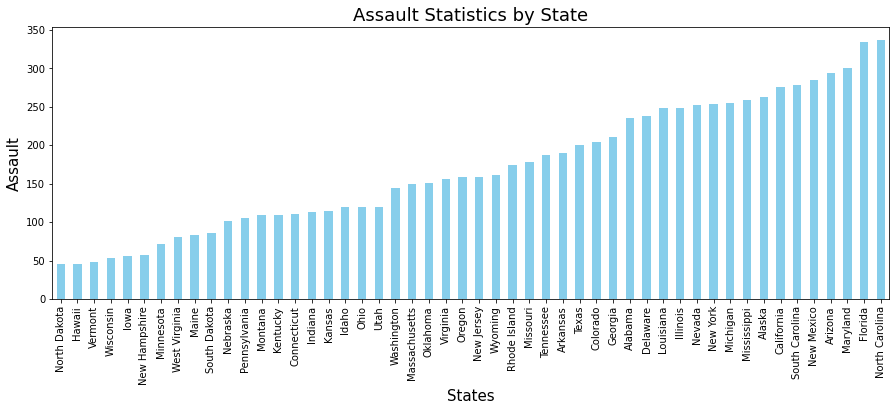

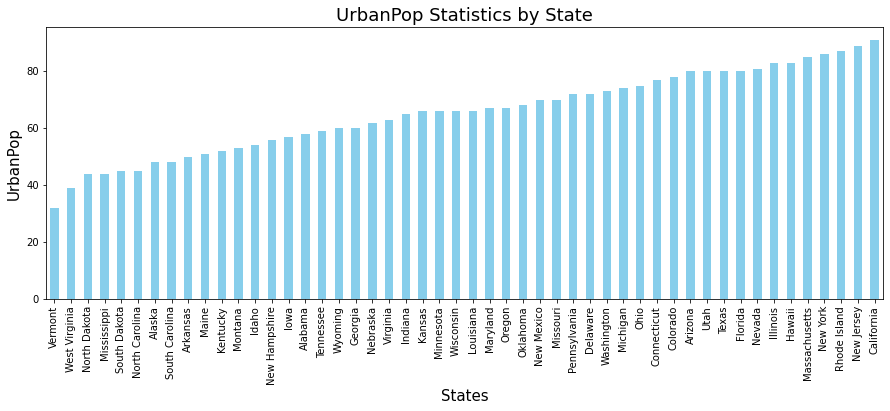

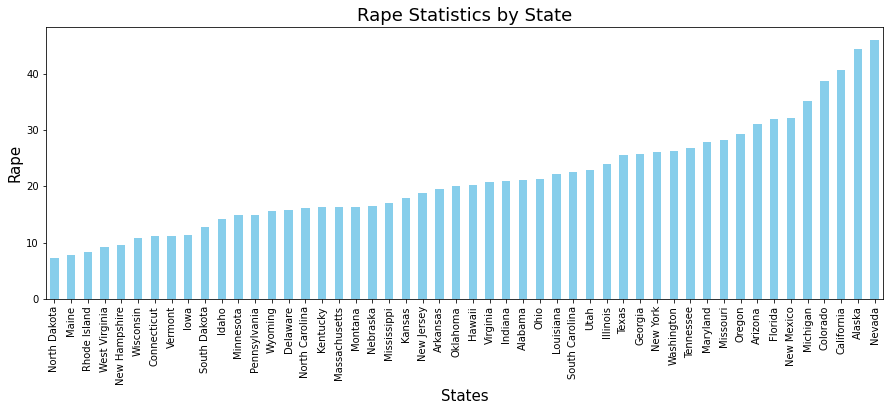

In [11]:
for column in df.columns:
    plt.figure(figsize=(15, 5))
    df[column].sort_values().plot(kind='bar', color='skyblue')
    plt.title(f"{column} Statistics by State", size=18)
    plt.xlabel("States", size=15)
    plt.ylabel(column, size=15)
    plt.xticks(rotation=90)
    #plt.tight_layout()

    plt.show()

### Correlation Analysis:

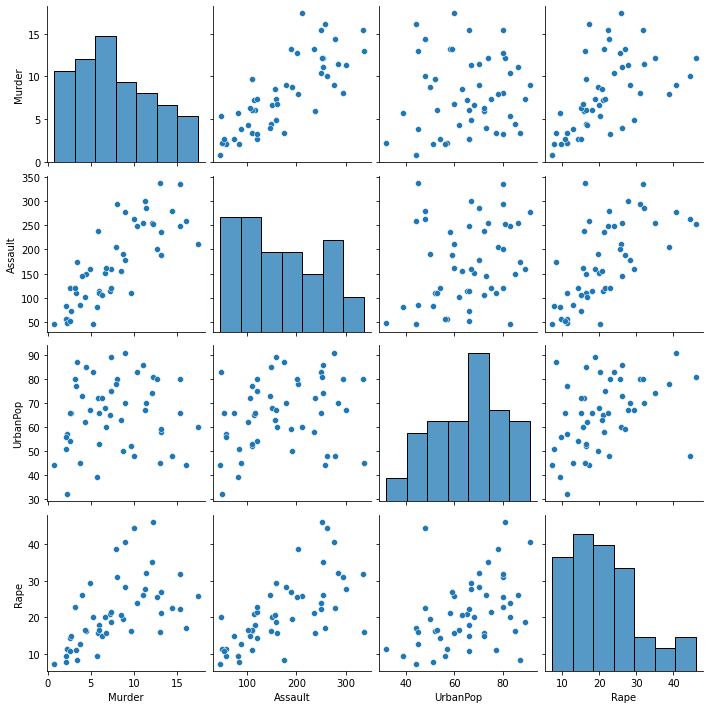

In [12]:
sns.pairplot(df)
plt.show()

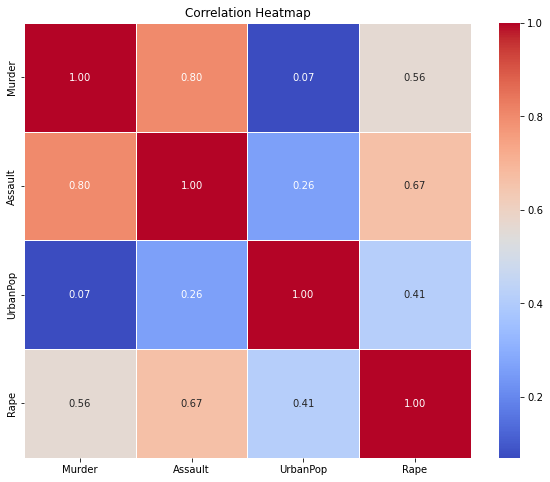

In [13]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 1. Hierarchical Clustering: 

## For Normalized Data:

In [14]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns, index=df.index)
#df_norm.head()
df_norm.shape

(50, 4)

### Creating Dendrograms

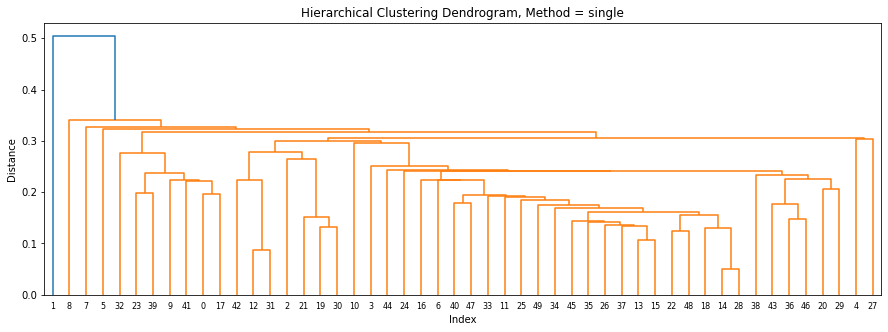

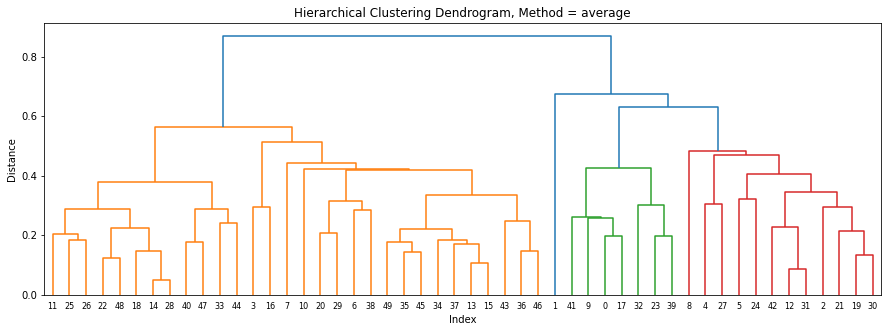

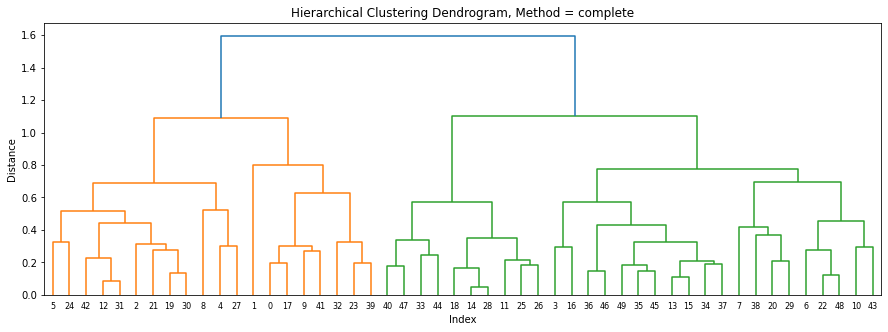

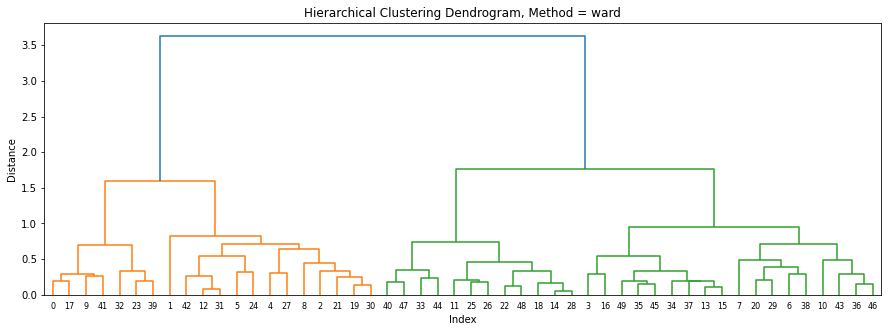

In [15]:
methods = ['single', 'average', 'complete', 'ward']
for i in methods:
    z = linkage(df_norm, method=i, metric='euclidean')
    plt.figure(figsize=(15, 5))
    plt.title(f'Hierarchical Clustering Dendrogram, Method = {i}')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    dendrogram(z, leaf_rotation=360, 
              #leaf_font_size=15
          )
    plt.show()

In [16]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n in n_clusters:
    for linkage in ['single', 'average', 'complete', 'ward']:
        h_cluster_nrm = AgglomerativeClustering(n_clusters=n, linkage=linkage, affinity='euclidean').fit(df_norm)
        s_score_nrm = silhouette_score(df_norm, h_cluster.labels_)
        print("For n_clusters =", n, "The average silhouette_score with linkage", linkage, ":", s_score)
    print()

For n_clusters = 2 The average silhouette_score with linkage single : 0.21033337025958482
For n_clusters = 2 The average silhouette_score with linkage average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage ward : 0.42364457559625074

For n_clusters = 3 The average silhouette_score with linkage single : 0.14223288708185441
For n_clusters = 3 The average silhouette_score with linkage average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage ward : 0.31916915428121284

For n_clusters = 4 The average silhouette_score with linkage single : -0.16741191954744047
For n_clusters = 4 The average silhouette_score with linkage average : 0.3699239114027717
For n_clusters = 4 The average silhouette_score with linkage complete : 0.30607294424263076
For

Based on the provided silhouette scores, the highest silhouette score of 0.424 is achieved when n_clusters = 2 with the average linkage method. 

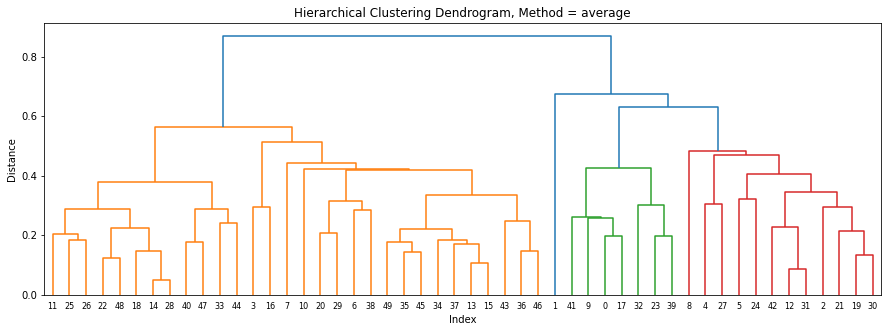

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_norm, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram, Method = average')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=360,
              #leaf_font_size=15
          )
plt.show()

In [23]:
h_avg = AgglomerativeClustering(n_clusters=2, linkage= 'average', affinity='euclidean').fit(df_norm)
#cluster_labels=pd.Series(h_avg.labels_)
df_avg = df.copy()
df_avg['clust']=h_avg.labels_
df_avg

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0


In [24]:
grouped = df_avg.groupby('clust')
      
for name, group in grouped:
    print("Cluster:", name)
    print(group)
    print()

Cluster: 0
                Murder  Assault  UrbanPop  Rape  clust
States                                                
Alabama           13.2      236        58  21.2      0
Alaska            10.0      263        48  44.5      0
Arizona            8.1      294        80  31.0      0
California         9.0      276        91  40.6      0
Colorado           7.9      204        78  38.7      0
Florida           15.4      335        80  31.9      0
Georgia           17.4      211        60  25.8      0
Illinois          10.4      249        83  24.0      0
Louisiana         15.4      249        66  22.2      0
Maryland          11.3      300        67  27.8      0
Michigan          12.1      255        74  35.1      0
Mississippi       16.1      259        44  17.1      0
Missouri           9.0      178        70  28.2      0
Nevada            12.2      252        81  46.0      0
New Mexico        11.4      285        70  32.1      0
New York          11.1      254        86  26.1      0

In [35]:
df_avg.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


## For Standardized Data:

In [26]:
df1 = StandardScaler().fit_transform(df)
df_std = pd.DataFrame(df1, columns=df.columns, index=df.index)
print(df_std.shape)
print(type(df_std))

(50, 4)
<class 'pandas.core.frame.DataFrame'>


### Creating Dendrograms

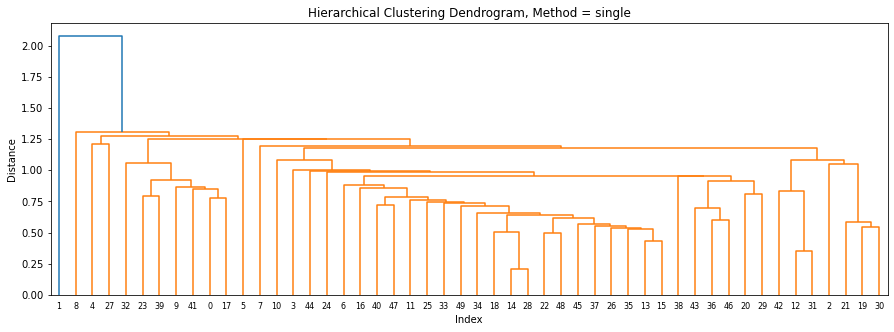

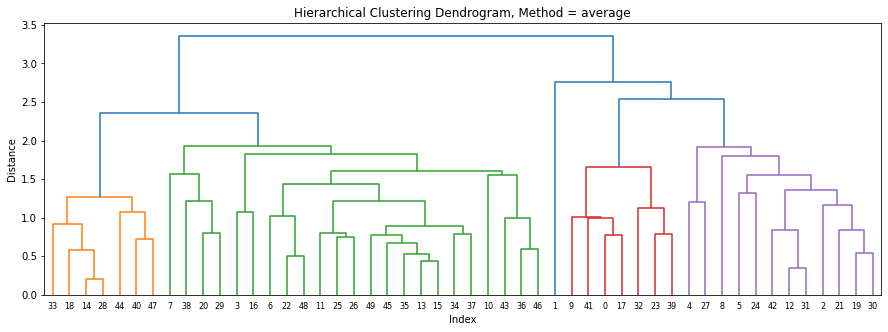

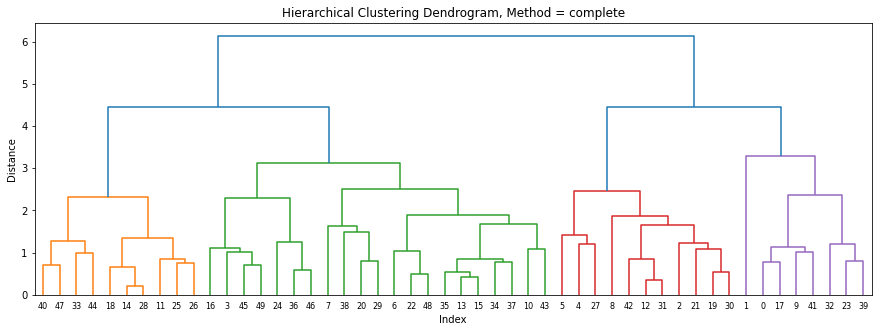

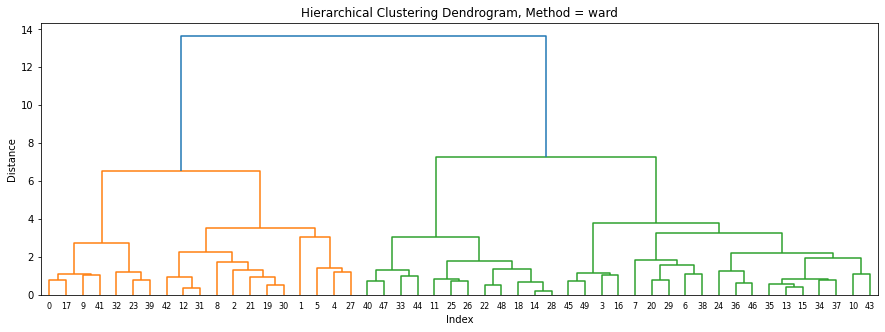

In [27]:
# Define linkage methods
methods = ['single', 'average', 'complete', 'ward']

# Plot dendrograms for each linkage method
for method in methods:
    z = linkage(df_std, method=method, metric='euclidean')
    plt.figure(figsize=(15, 5))
    plt.title(f'Hierarchical Clustering Dendrogram, Method = {method}')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    dendrogram(z, leaf_rotation=360)
    plt.show()

In [256]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n in n_clusters:
    for linkage in ['single', 'average', 'complete', 'ward']:
        h_cluster_std = AgglomerativeClustering(n_clusters=n, linkage=linkage, affinity='euclidean').fit(df_std)
        s_score_std_ = silhouette_score(df_std, h_cluster.labels_)
        print("For n_clusters =", n, "The average silhouette_score with linkage", linkage, ":", s_score)
    print()

For n_clusters = 2 The average silhouette_score with linkage single : 0.234555987531598
For n_clusters = 2 The average silhouette_score with linkage average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage ward : 0.4047944502519567

For n_clusters = 3 The average silhouette_score with linkage single : 0.14582343625170263
For n_clusters = 3 The average silhouette_score with linkage average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage ward : 0.31036358174027895

For n_clusters = 4 The average silhouette_score with linkage single : 0.174058063042673
For n_clusters = 4 The average silhouette_score with linkage average : 0.3636819420151221
For n_clusters = 4 The average silhouette_score with linkage complete : 0.31595507426164543
For n_clust

In [257]:
h_cluster = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean').fit(df_norm)
s_score_nrm = silhouette_score(df_norm, h_cluster.labels_)

h_cluster = AgglomerativeClustering(n_clusters=n, linkage=linkage, affinity='euclidean').fit(df_std)
s_score_std = silhouette_score(df_std, h_cluster.labels_)

From these results, we can see that the highest silhouette score is achieved when n_clusters = 2 with the average linkage method.

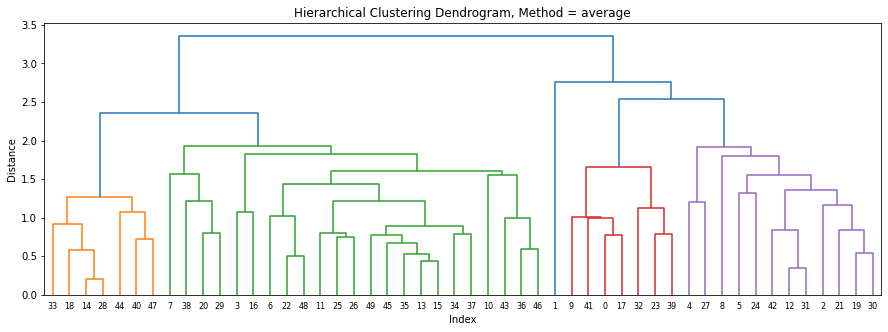

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_std, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram, Method = average')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=360,
              #leaf_font_size=15
          )
plt.show()

In [31]:
h_avg = AgglomerativeClustering(n_clusters=2, linkage= 'average', affinity='euclidean').fit(df_std)
#cluster_labels=pd.Series(h_avg.labels_)
df_avg = df.copy()
df_avg['clust']=h_avg.labels_
df_avg.head()

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [32]:
grouped = df_avg.groupby('clust')
      
for name, group in grouped:
    print("Cluster:", name)
    print(group)
    print()

Cluster: 0
                Murder  Assault  UrbanPop  Rape  clust
States                                                
Alabama           13.2      236        58  21.2      0
Alaska            10.0      263        48  44.5      0
Arizona            8.1      294        80  31.0      0
California         9.0      276        91  40.6      0
Colorado           7.9      204        78  38.7      0
Florida           15.4      335        80  31.9      0
Georgia           17.4      211        60  25.8      0
Illinois          10.4      249        83  24.0      0
Louisiana         15.4      249        66  22.2      0
Maryland          11.3      300        67  27.8      0
Michigan          12.1      255        74  35.1      0
Mississippi       16.1      259        44  17.1      0
Missouri           9.0      178        70  28.2      0
Nevada            12.2      252        81  46.0      0
New Mexico        11.4      285        70  32.1      0
New York          11.1      254        86  26.1      0

In [34]:
df_avg.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


# 2. K-Means Clustering:

## For Normalized Data:

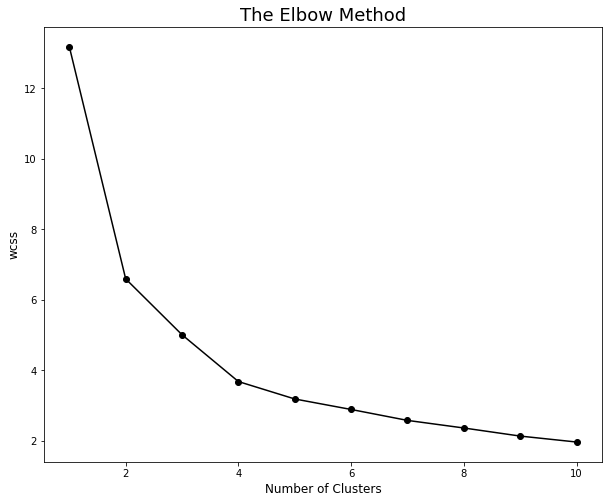

In [36]:
fig = plt.figure(figsize=(10,8))

wcss=[]

for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_norm)
    wcss.append(clf.inertia_)
    
plt.plot(range(1,11), wcss, color="black", marker="o")
#plt.scatter(range(1,11),wcss, )
plt.title("The Elbow Method", size=18)
plt.ylabel('wcss', size=12)
plt.xlabel('Number of Clusters', size=12)
plt.show()

The plot of the elbow method does not exhibit a distinct 'elbow' point, making it challenging to determine the optimal number of clusters. However, based on the silhouette scores, both 4 and 5 clusters appear to be reasonable choices. Let's further evaluate the clustering using the silhouette score.

### Implementing KMeans Clustering Algorithm with K=5 on Normalized Dataset

In [37]:
clf5 = KMeans(n_clusters=5)
y_kmeans5 = clf5.fit_predict(df_norm)

In [38]:
clf5.cluster_centers_

array([[0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072]])

In [39]:
clf5.labels_

array([3, 1, 1, 2, 1, 1, 4, 2, 1, 3, 4, 0, 1, 2, 0, 2, 2, 3, 0, 1, 4, 1,
       0, 3, 2, 0, 0, 1, 0, 4, 1, 1, 3, 0, 4, 2, 2, 4, 4, 3, 0, 3, 1, 4,
       0, 2, 4, 0, 0, 2], dtype=int32)

In [40]:
clf5.inertia_

3.1842618139677215

In [42]:
md = pd.Series(y_kmeans5)
df5=df.copy()
df5['clust']=clf5.labels_
df5.head(10)

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,1


In [43]:
df5.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.091667,76.000000,52.083333,11.833333
1,10.966667,264.000000,76.500000,33.608333
2,7.340000,157.000000,63.300000,20.440000
3,14.671429,251.285714,54.285714,21.685714
4,4.955556,125.444444,80.111111,17.788889


### Visualization

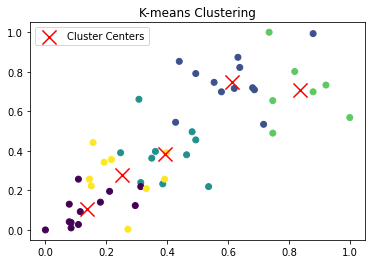

In [44]:
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=clf5.labels_, cmap='viridis')
centers = clf5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### Implementing KMeans Clustering Algorithm with K=4 on Normalized Dataset

In [45]:
clf4 = KMeans(n_clusters=4)
y_kmeans4 = clf4.fit_predict(df_norm)

In [46]:
clf4.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [47]:
clf4.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 3, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [48]:
clf4.inertia_

3.683456153585914

### Visualization

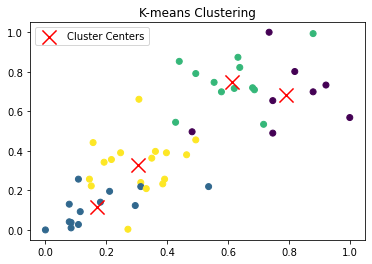

In [49]:
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=clf4.labels_, cmap='viridis')
centers = clf4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### Optimal K Value Determination Using Silhouette Score Metric, and Visualization of Clustering Results:

In [50]:
# Choose the range of k values
k_range = range(2, 11)


# Calculate silhouette score for different k values
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_norm)
    s_scores = silhouette_score(df_norm, labels)
    print(f'k-value:{k}, silhouette_scores:{s_scores}')
    silhouette_scores.append(s_score)

k-value:2, silhouette_scores:0.42364457559625074
k-value:3, silhouette_scores:0.31877550799979315
k-value:4, silhouette_scores:0.34089035600743633
k-value:5, silhouette_scores:0.3062742525752848
k-value:6, silhouette_scores:0.2703558739205172
k-value:7, silhouette_scores:0.23711197479268142
k-value:8, silhouette_scores:0.24422345369104229
k-value:9, silhouette_scores:0.23181794623773663
k-value:10, silhouette_scores:0.2619627739735731


In [246]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(df_norm)
s_scores = silhouette_score(df_norm, labels)

In [51]:
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_k

2

A higher silhouette score indicates better separation between clusters, so in this case, k=2 silhouette_scores:0.42364457559625074 would yield the best clustering result according to the silhouette score metric.

### Implementing KMeans Clustering Algorithm with K=2 on Normalized Dataset

In [52]:
clf2 =KMeans(n_clusters=2)
y_kmeans2 = clf2.fit_predict(df_norm)

In [53]:
clf2.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [54]:
clf2.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [55]:
clf2.inertia_

6.596893867946197

In [58]:
# md = pd.Series(y_kmeans)
df2=df.copy()
df2['clust']=clf2.labels_
df2.head(10)

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1


In [59]:
df2.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


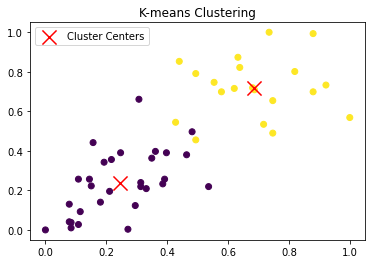

Optimal number of clusters (k) based on silhouette score: 2


In [60]:
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=clf2.labels_, cmap='viridis')
centers = clf2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

print("Optimal number of clusters (k) based on silhouette score:", optimal_k)

## For Standardized Data:

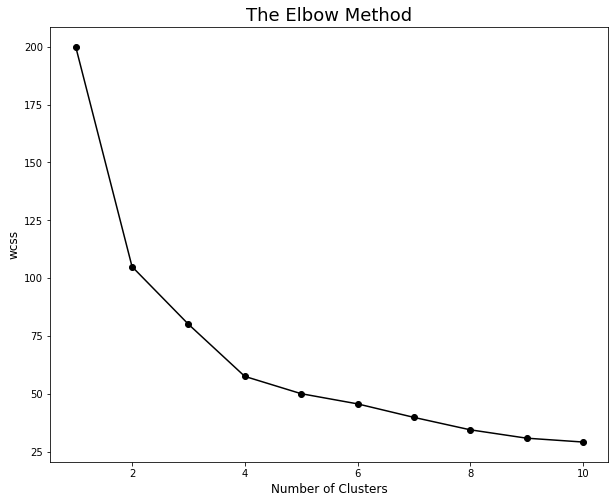

In [61]:
fig = plt.figure(figsize=(10,8))

wcss=[]

for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_std)
    wcss.append(clf.inertia_)
    
plt.plot(range(1,11), wcss, color="black", marker="o")
#plt.scatter(range(1,11),wcss, )
plt.title("The Elbow Method", size=18)
plt.ylabel('wcss', size=12)
plt.xlabel('Number of Clusters', size=12)
plt.show()

In [62]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(df_std)
    sil_score1= silhouette_score(df_std, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


Based on these scores:

- The silhouette score is highest for n_clusters = 2, indicating that clustering into 2 clusters provides the best separation between clusters.
- As the number of clusters increases beyond 2, the silhouette score generally decreases, suggesting poorer separation between clusters.

### Implementing KMeans Clustering Algorithm with K=2 on Standardized Dataset

In [63]:
clf_std = KMeans(n_clusters=2)
kmeans_std = clf_std.fit_predict(df_std)

In [64]:
clf_std.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

In [65]:
clf_std.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
clf_std.inertia_

104.96163315756873

In [67]:
dfs = df.copy()
dfs['clust']=clf_std.labels_
dfs

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0


In [68]:
dfs.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


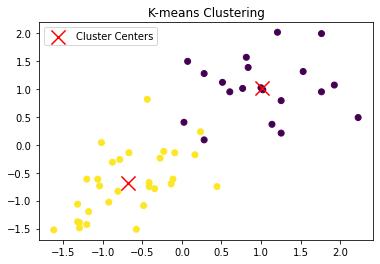

silhouette_score :  0.4084890326217641
Optimal number of clusters (k) based on silhouette score: 2


In [263]:
plt.scatter(df_std.iloc[:, 0], df_std.iloc[:, 1], c=clf_std.labels_, cmap='viridis')
centers = clf_std.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

s_score_stdk= silhouette_score(df_std, clf_std.labels_)
print('silhouette_score : ', s_score_std)
print("Optimal number of clusters (k) based on silhouette score: 2")

# 3. DBSCAN Clustering

## For Normalized Data:

In [188]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


### plot the k-distance graph.

In [74]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=32)  # Using 2^n value
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)

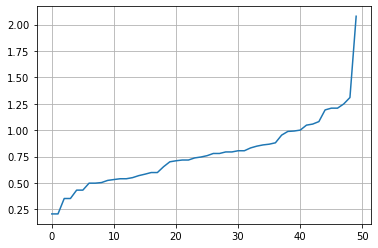

In [194]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)
plt.grid(True)


In [183]:
dbscan = DBSCAN(eps=0.295, min_samples=2)  
dbscan.fit(df_norm)

DBSCAN(eps=0.295, min_samples=2)

In [268]:
DBSCAN_Labels = dbscan.labels_
print("DBSCAN Labels:", DBSCAN_Labels )

DBSCAN Labels: [ 0 -1  1  2 -1 -1  2 -1 -1  0 -1  2  1  2  2  2  2  0  2  1  2  1  2  0
  2  2  2 -1  2  2  1  1  0  2  2  2  2  2  2  0  2  0  1  2  2  2  2  2
  2  2]


In [185]:
sil_scoredb= silhouette_score(df_norm, dbscan.labels_)
sil_scoredb

0.2812410528811714

In [186]:
df_dbn = df.copy()
df_dbn['clust']=dbscan.labels_
df_dbn

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1


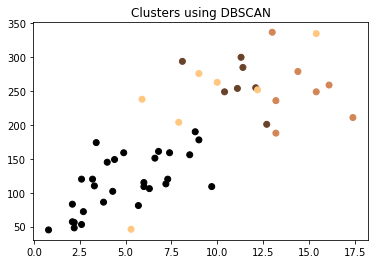

In [187]:
plt.scatter(df_dbn.iloc[:, 0], df_dbn.iloc[:, 1], c=dbscan.labels_, cmap=plt.cm.copper_r)
plt.title('Clusters using DBSCAN')
plt.show()

In [240]:
df_dbn.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
-1,9.385714,230.571429,76.142857,33.957143
0,14.671429,251.285714,54.285714,21.685714
1,11.014286,262.571429,77.142857,28.800000
2,4.962069,114.724138,62.896552,16.224138


## For Standardized Data:

In [189]:
df_std.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [190]:
neigh = NearestNeighbors(n_neighbors=32)  # Using 2^n value
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)

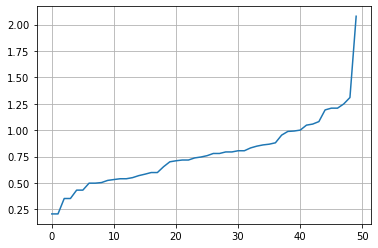

In [192]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(True)

In [231]:
dbscan1 = DBSCAN(eps=1.2, min_samples=2)  
dbscan1.fit(df_std)

DBSCAN(eps=1.2, min_samples=2)

In [211]:
print("DBSCAN Labels:", dbscan1.labels_)

DBSCAN Labels: [ 0 -1  1  1 -1 -1  1  1 -1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0
  1  1  1 -1  1  1  1  1  0  1  1  1  1  1  1  0  1  0  1  1  1  1  1  1
  1  1]


In [232]:
sil_scoredbs= silhouette_score(df_std, dbscan1.labels_)
sil_scoredbs

0.2677430171383357

In [233]:
df_dbs = df.copy()
df_dbs['clust']=dbscan1.labels_
df_dbs

,Murder,Assault,UrbanPop,Rape,clust
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,-1


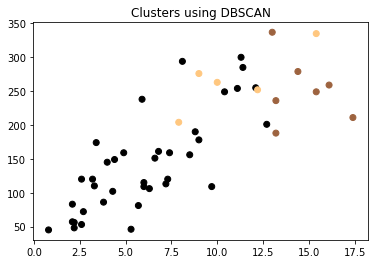

In [234]:
plt.scatter(df_dbs.iloc[:, 0], df_dbs.iloc[:, 1], c=dbscan1.labels_, cmap=plt.cm.copper_r)
plt.title('Clusters using DBSCAN')
plt.show()

In [239]:
df_dbs.groupby('clust').mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
-1,10.900000,266.000000,75.600000,40.340000
0,14.671429,251.285714,54.285714,21.685714
1,6.110526,143.394737,66.289474,18.634211


## Evaluate clustering using silhouette score for normalised data:

In [250]:
print(f'Silhouette Score for Hierarchical Clustering: {s_score_nrm}')
print(f'Silhouette Score for KMeans Clustering: {s_scores}')
print(f'Silhouette Score for Clustering using DBSCAN: {sil_scoredb}')

Silhouette Score for Hierarchical Clustering: 0.42364457559625074
Silhouette Score for KMeans Clustering: 0.42364457559625074
Silhouette Score for Clustering using DBSCAN: 0.2812410528811714


- Both hierarchical clustering and KMeans clustering achieved a silhouette score of 0.42364457559625074. This suggests that the clusters produced by these two algorithms on normalized data have similar coherence and separation, and they are of reasonably good quality.

- However, the silhouette score for clustering using DBSCAN is lower at 0.2812410528811714. This indicates that the clusters generated by DBSCAN on normalized data may be less well-defined or more overlapping compared to hierarchical clustering and KMeans clustering.

## Evaluate clustering using silhouette score for Standardized data:

In [265]:
print(f'Silhouette Score for Hierarchical Clustering: {s_score_std}')
print(f'Silhouette Score for KMeans Clustering: {s_score_stdk}')
print(f'Silhouette Score for Clustering using DBSCAN: {sil_scoredbs}')

Silhouette Score for Hierarchical Clustering: 0.4084890326217641
Silhouette Score for KMeans Clustering: 0.4084890326217641
Silhouette Score for Clustering using DBSCAN: 0.2677430171383357


- For both hierarchical clustering and KMeans clustering, the silhouette score is 0.4084890326217641. This indicates that the clusters produced by these two algorithms have similar coherence and separation, and they are of reasonably good quality.

- However, the silhouette score for clustering using DBSCAN is lower at 0.2677430171383357. This suggests that the clusters generated by DBSCAN on standardized data may be less well-defined or more overlapping compared to hierarchical clustering and KMeans clustering.

In [273]:
cluster1 = pd.DataFrame(df.loc[df2.clust==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df2.clust==1].mean(),columns= ['Cluster2_avg'])
avg = pd.concat([cluster1,cluster2],axis=1)
avg

,Cluster1_avg,Cluster2_avg
Murder,4.870000,12.165
Assault,114.433333,255.250
UrbanPop,63.633333,68.400
Rape,15.943333,29.165


- Cluster 1, characterized by comparatively lower rates of Murder, Assault, and Rape alongside a slightly lower UrbanPop, contrasts with Cluster 2, marked by notably higher crime rates and a slightly higher UrbanPop.

-- THE END --